In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_excel('HUmidity.xlsx')
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [3]:
# NA values are filled as -200
# So we are replacing -200 with np.NaN

df.replace(to_replace=-200, value=np.NaN, inplace=True)
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,NaN,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [4]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [5]:
# As we can see that the feature column NMHC(GT) contains almost 90% NA values.
# So we must drop it.

df.drop(['NMHC(GT)'], axis=1, inplace=True)

In [6]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

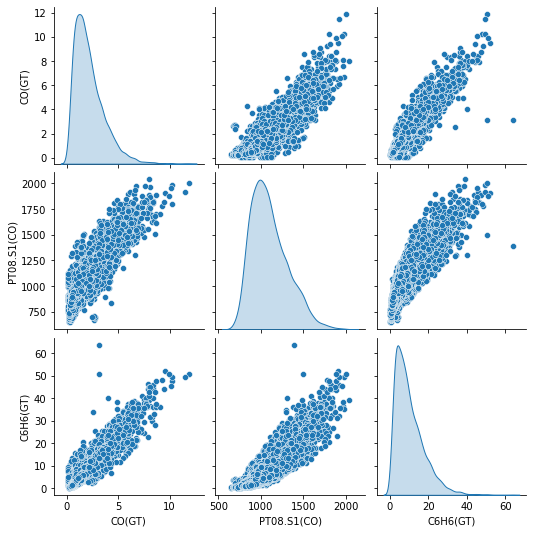

In [7]:
sns.pairplot(df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)']], diag_kind='kde')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO(GT),7674.0,2.152750,1.453252,0.100000,1.100000,1.800000,2.900000,11.900000
PT08.S1(CO),8991.0,1099.707856,217.084571,647.250000,936.750000,1063.000000,1231.250000,2039.750000
C6H6(GT),8991.0,10.082993,7.449640,0.149048,4.436942,8.239851,13.988478,63.741476
PT08.S2(NMHC),8991.0,939.029205,266.829000,383.250000,734.375000,909.000000,1116.250000,2214.000000
NOx(GT),7718.0,246.881252,212.971224,2.000000,98.000000,179.800000,326.000000,1479.000000
PT08.S3(NOx),8991.0,835.370973,256.815106,322.000000,657.875000,805.500000,969.250000,2682.750000
NO2(GT),7715.0,113.075515,48.359250,2.000000,78.000000,109.000000,142.000000,339.700000
PT08.S4(NO2),8991.0,1456.143486,346.204540,551.000000,1226.625000,1462.750000,1673.500000,2775.000000
PT08.S5(O3),8991.0,1022.780725,398.480897,221.000000,731.375000,963.250000,1273.375000,2522.750000
T,8991.0,18.316054,8.832888,-1.900000,11.787500,17.750000,24.400000,44.600000


In [9]:
# Let us drop all rows with NA

df.dropna(inplace=True)

In [10]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Time           6941 non-null   object        
 2   CO(GT)         6941 non-null   float64       
 3   PT08.S1(CO)    6941 non-null   float64       
 4   C6H6(GT)       6941 non-null   float64       
 5   PT08.S2(NMHC)  6941 non-null   float64       
 6   NOx(GT)        6941 non-null   float64       
 7   PT08.S3(NOx)   6941 non-null   float64       
 8   NO2(GT)        6941 non-null   float64       
 9   PT08.S4(NO2)   6941 non-null   float64       
 10  PT08.S5(O3)    6941 non-null   float64       
 11  T              6941 non-null   float64       
 12  RH             6941 non-null   float64       
 13  AH             6941 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 813.4+ KB


In [12]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [13]:
# Let us drop Date and Time as does not play any role here.
# As our target is predicting RH(Relative Humidity), we must drop AH(Absolute Humudity)

df.drop(['Date', 'Time', 'AH'], axis=1, inplace=True)
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001
...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000
9353,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000
9354,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000
9355,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000


In [14]:
x = df.drop(['RH'], axis=1)
y = df['RH']

In [15]:
x

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150
...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850
9353,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325
9354,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900
9355,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325


In [16]:
y = np.round(y)
y

0       49.0
1       48.0
2       54.0
3       60.0
4       60.0
        ... 
9352    29.0
9353    24.0
9354    18.0
9355    14.0
9356    13.0
Name: RH, Length: 6941, dtype: float64

In [17]:
x = np.array(x)
y = np.array(y)

In [18]:
# Linear Regression (Ridge regression with l2 regularization(alpha))

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Feature Scaling

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

for alpha in [0, 1, 10, 15, 20, 50, 100, 1000]:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    print('\nAlpha:' + str(alpha))
    print('Traaining Accuracy:' + str(ridge.score(x_train, y_train)))
    print('Testing Accuracy:' + str(ridge.score(x_test, y_test)))


Alpha:0
Traaining Accuracy:0.7900040700540543
Testing Accuracy:0.6534496787206073

Alpha:1
Traaining Accuracy:0.7873910503571984
Testing Accuracy:0.691735561031221

Alpha:10
Traaining Accuracy:0.7196357053790787
Testing Accuracy:0.7198919897234168

Alpha:15
Traaining Accuracy:0.6858547041398406
Testing Accuracy:0.6960741861565516

Alpha:20
Traaining Accuracy:0.6568389197263733
Testing Accuracy:0.6724275408845601

Alpha:50
Traaining Accuracy:0.5380104895476375
Testing Accuracy:0.5643773679617685

Alpha:100
Traaining Accuracy:0.4282605476767912
Testing Accuracy:0.45656309270898043

Alpha:1000
Traaining Accuracy:0.11329895672127765
Testing Accuracy:0.12397091522848935


In [19]:
# Polynomial Regression with degree of 2 (Ridge regression with l2 regularization(alpha))

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state = 0)

# Feature Scaling

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

for alpha in [0, 1, 10, 15, 20, 50, 100, 1000]:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    print('\nAlpha:' + str(alpha))
    print('Traaining Accuracy:' + str(ridge.score(x_train, y_train)))
    print('Testing Accuracy:' + str(ridge.score(x_test, y_test)))


Alpha:0
Traaining Accuracy:0.9130304706621429
Testing Accuracy:-13.49896589258379

Alpha:1
Traaining Accuracy:0.8545449684903311
Testing Accuracy:0.8110398083201382

Alpha:10
Traaining Accuracy:0.783641444855935
Testing Accuracy:0.7625691780031033

Alpha:15
Traaining Accuracy:0.7653953249377107
Testing Accuracy:0.7495961421711557

Alpha:20
Traaining Accuracy:0.7503836581379499
Testing Accuracy:0.7386210069141115

Alpha:50
Traaining Accuracy:0.6891077215720649
Testing Accuracy:0.6893733217664175

Alpha:100
Traaining Accuracy:0.6285799334172734
Testing Accuracy:0.6361260827382405

Alpha:1000
Traaining Accuracy:0.3269245359376237
Testing Accuracy:0.346528157620531


In [20]:
# Polynomial Regression with degree of 3 (Ridge regression with l2 regularization(alpha))

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state = 0)

# Feature Scaling

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

for alpha in [0, 1, 10, 15, 20, 50, 100, 1000]:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    print('\nAlpha:' + str(alpha))
    print('Traaining Accuracy:' + str(ridge.score(x_train, y_train)))
    print('Testing Accuracy:' + str(ridge.score(x_test, y_test)))


Alpha:0
Traaining Accuracy:0.9507085525933142
Testing Accuracy:-7160422.258470003

Alpha:1
Traaining Accuracy:0.8908919976667771
Testing Accuracy:0.7584736375453796

Alpha:10
Traaining Accuracy:0.8214244219917175
Testing Accuracy:0.7118668275149904

Alpha:15
Traaining Accuracy:0.8040729267040028
Testing Accuracy:0.7103889941981181

Alpha:20
Traaining Accuracy:0.7906830528858917
Testing Accuracy:0.710464699223541

Alpha:50
Traaining Accuracy:0.7398227246657644
Testing Accuracy:0.7072920778110627

Alpha:100
Traaining Accuracy:0.6907893132046499
Testing Accuracy:0.6870844719106958

Alpha:1000
Traaining Accuracy:0.4697292391238518
Testing Accuracy:0.4952699816521501
